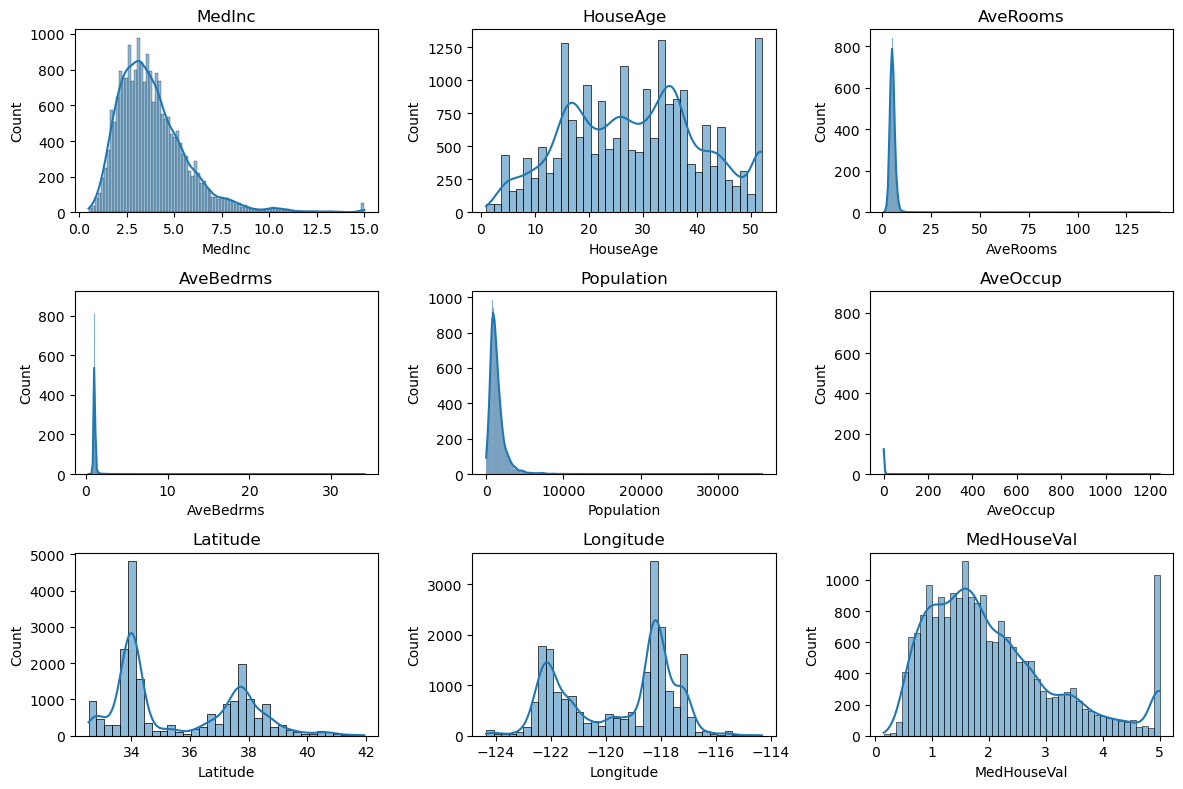

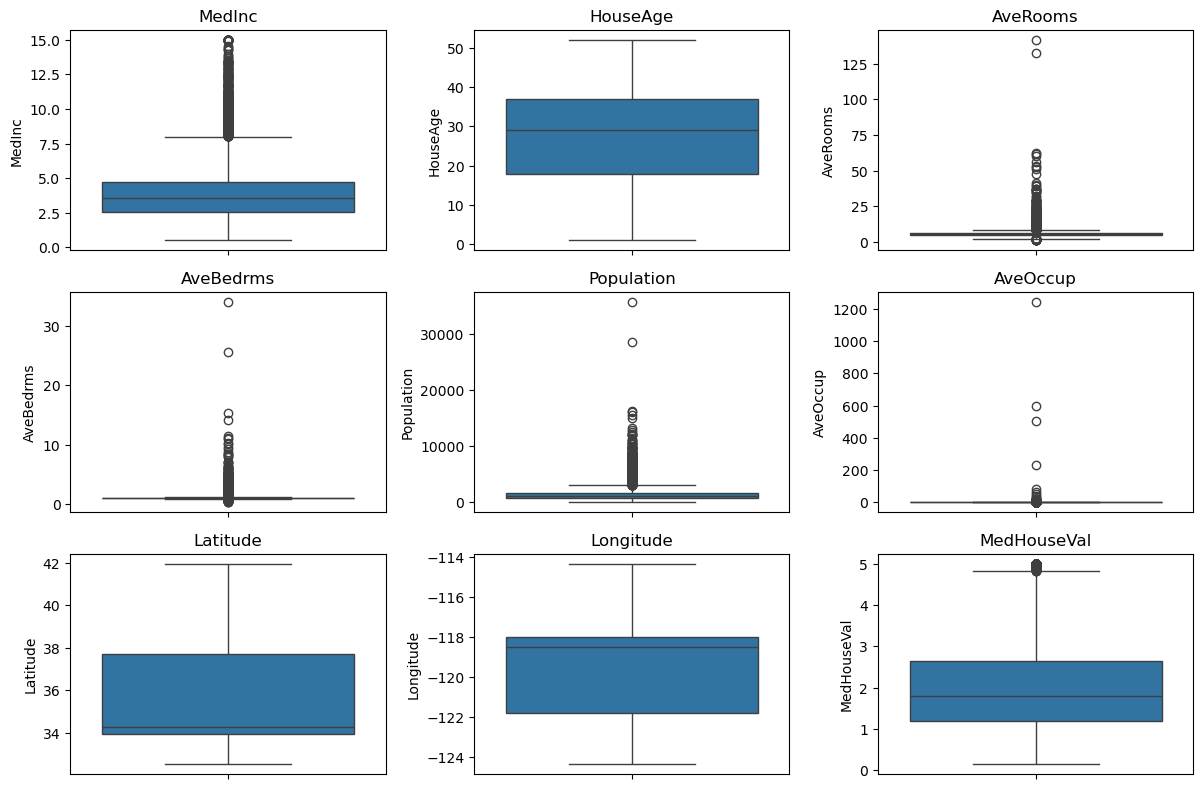

In [1]:
#1) EDA using California Dataset (Histogram & Boxplot)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

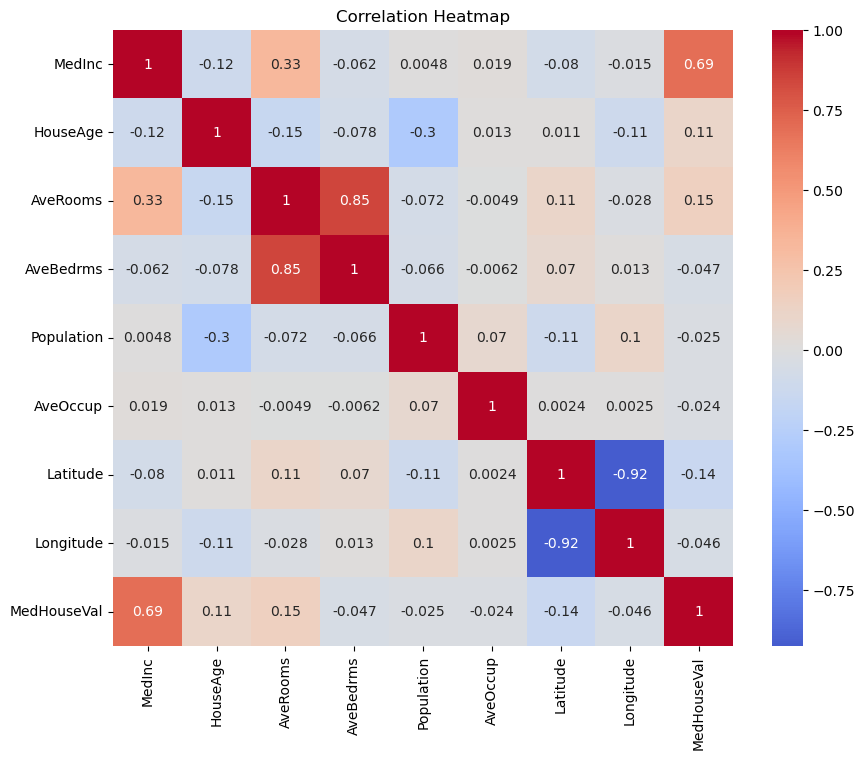

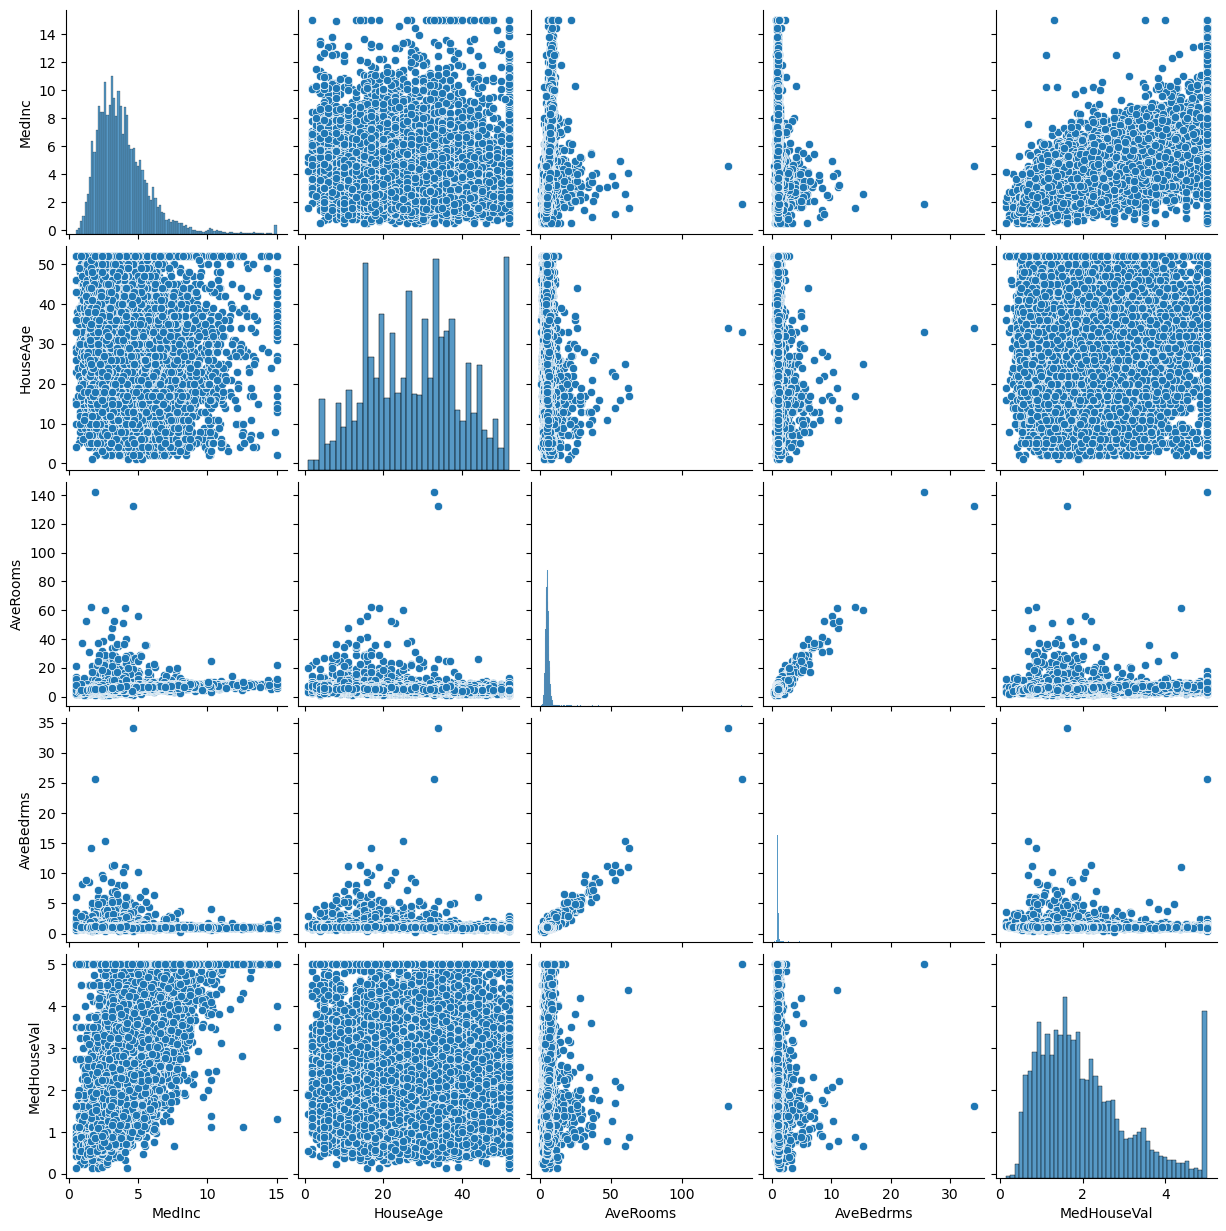

In [2]:
#2) EDA using California Dataset (Heatmap & PairPlot)

# Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'MedHouseVal']])
plt.show()

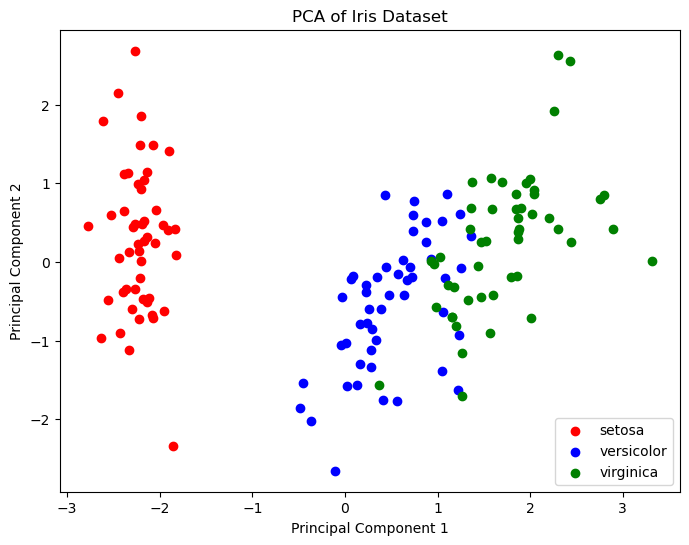

Explained variance ratio: [0.72962445 0.22850762]


In [3]:
#3) PCA Analysis using Iris Dataset

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', label=iris.target_names[0])
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', label=iris.target_names[1])
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], color='green', label=iris.target_names[2])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

In [4]:
#4) Find-S Algorithm Implementation

import numpy as np

# Training data
data = np.array([
    ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']
])

# Separate features and target
X = data[:, :-1]
y = data[:, -1]

# Initialize hypothesis
hypothesis = ['0'] * X.shape[1]

# Find-S algorithm
for i in range(X.shape[0]):
    if y[i] == 'Yes':
        for j in range(X.shape[1]):
            if hypothesis[j] == '0':
                hypothesis[j] = X[i][j]
            elif hypothesis[j] != X[i][j]:
                hypothesis[j] = '?'
    print(f"Step {i+1}: {hypothesis}")

print("\nFinal Hypothesis:", hypothesis)

Step 1: ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
Step 2: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
Step 3: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
Step 4: ['Sunny', 'Warm', '?', 'Strong', '?', '?']

Final Hypothesis: ['Sunny', 'Warm', '?', 'Strong', '?', '?']


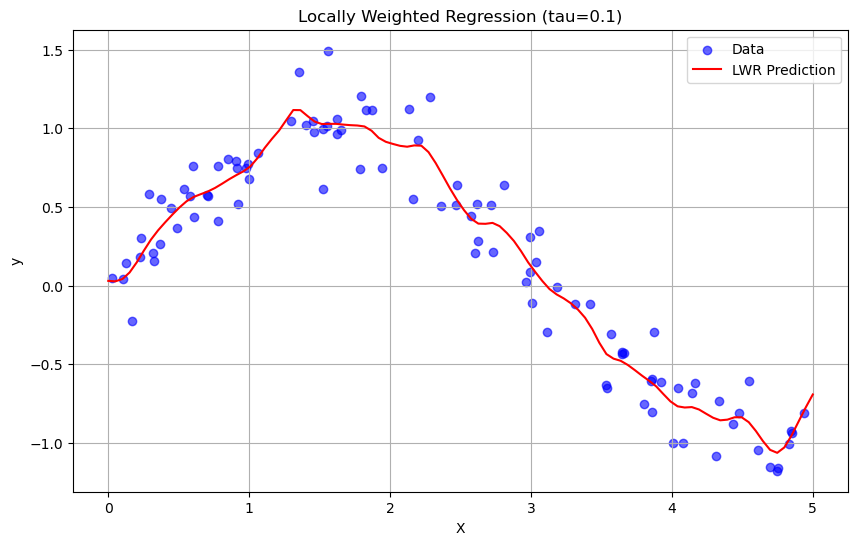

In [16]:
#5) LWR Regression (Locally Weighted Regression)

import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100))
y = np.sin(X) + 0.2 * np.random.randn(100)

# Locally Weighted Regression function
def locally_weighted_regression(x, X, y, tau=0.1):
    m = X.shape[0]
    X_design = np.vstack((np.ones(m), X)).T  # Add bias term
    x_query = np.array([1, x])               # Query point with bias
    
    # Calculate weights
    w = np.exp(-((X - x)**2) / (2 * tau**2)).flatten()
    W = np.diag(w)
    
    # Compute theta using weighted normal equation
    theta = np.linalg.pinv(X_design.T @ W @ X_design) @ (X_design.T @ W @ y)
    
    return x_query @ theta

# Predict for test points
X_test = np.linspace(0, 5, 100)
y_pred = [locally_weighted_regression(x, X, y, tau=0.1) for x in X_test]

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='LWR Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Locally Weighted Regression (tau=0.1)')
plt.legend()
plt.grid(True)
plt.show()



Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.02327770606369
Mean squared error: 0.56
R2 score: 0.58


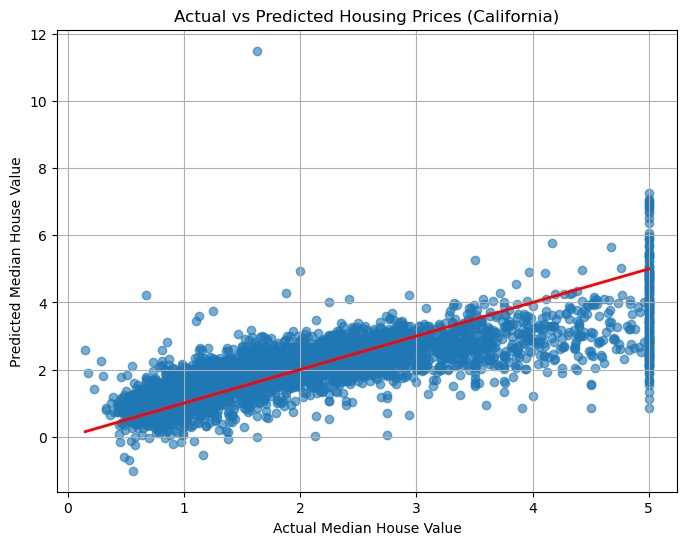

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("R2 score: %.2f" % r2_score(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Housing Prices (California)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.grid(True)
plt.show()


C:\Users\Srijan\AppData\Local\Temp\ipykernel_17948\368067110.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns)


Coefficients: [ 0.00000000e+00 -6.11365869e-01  2.34566381e-03 -2.66743863e-06]
Intercept: 62.884821540467044
Mean squared error: 18.46
R2 score: 0.64


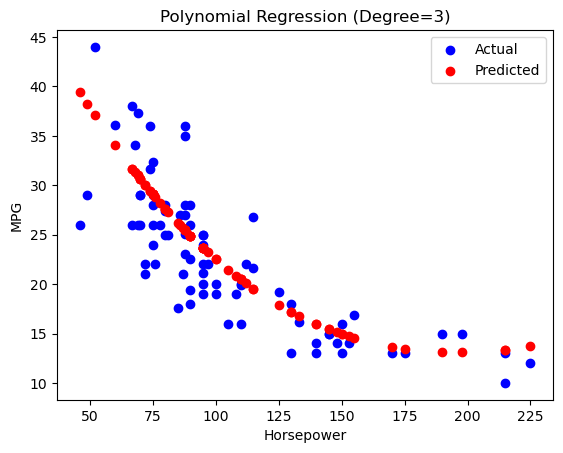

In [8]:
#7) Polynomial Regression using Auto MPG Dataset

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
           'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv(url, delim_whitespace=True, names=columns)

# Clean data
df = df[df.horsepower != '?']
df['horsepower'] = df['horsepower'].astype(float)

# Select features and target
X = df[['horsepower']].values
y = df['mpg'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred = model.predict(X_test_poly)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("R2 score: %.2f" % r2_score(y_test, y_pred))

# Plot results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression (Degree=3)')
plt.legend()
plt.show()

Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix:
 [[39  4]
 [ 2 69]]


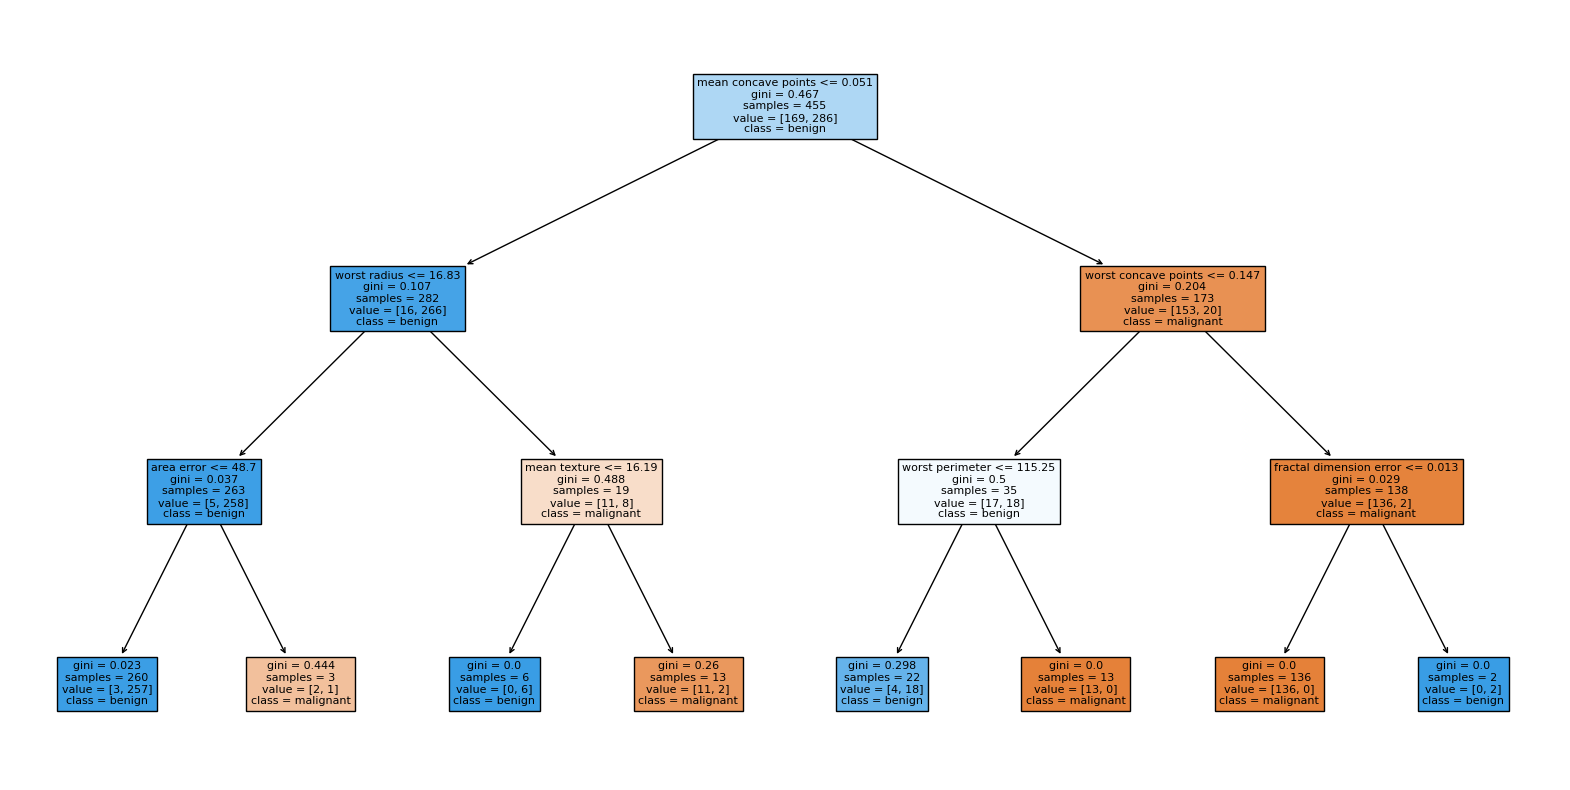

In [9]:
#8) Decision Tree Implementation using Breast Cancer Dataset

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

In [10]:
#9) SVM using Random Dataset

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate random dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.845

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        93
           1       0.90      0.80      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


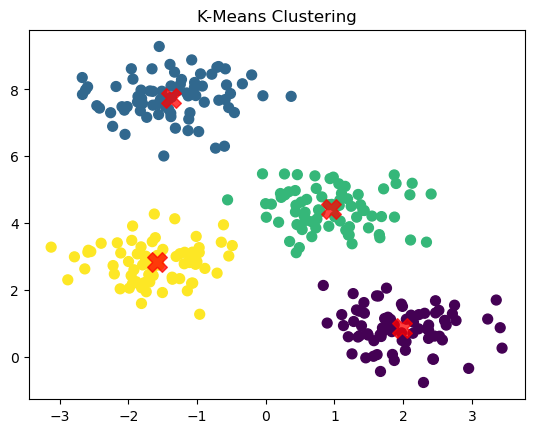

In [11]:
#10) K-Means Clustering using Random Dataset

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate random dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-Means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.show()

In [6]:
#11) DBSCAN using Random Dataset

import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

df = pd.read_csv("Mall_Customers.csv")

X_train = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_

db = DBSCAN(eps=0.5, min_samples=4).fit(X)
y_db = db.labels_

In [14]:
#12) K-Medoid using Random Dataset

from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate random dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-Medoids
kmedoids = KMedoids(n_clusters=4, random_state=0)
kmedoids.fit(X)
y_kmedoids = kmedoids.predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmedoids, s=50, cmap='viridis')

# Plot medoids
medoids = kmedoids.cluster_centers_
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Medoids Clustering')
plt.show()

ModuleNotFoundError: No module named 'sklearn_extra'

In [15]:
!pip install scikit-learn-extra


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/819.0 kB ? eta -:--:--
      --------------------------------------- 10.2/819.0 kB ? eta -:--:--
     - ----------------------------------- 30.7/819.0 kB 217.9 kB/s eta 0:00:04
     - ----------------------------------- 30.7/819.0 kB 217.9 kB/s eta 0:00:04
     - ----------------------------------- 41.0/819.0 kB 217.9 kB/s eta 0:00:04
     ----- ------------------------------ 122.9/819.0 kB 479.3 kB/s eta 0:00:02
     ----------- ------------------------ 256.0/819.0 kB 874.6 kB/s eta 0:00:01
     ----------------- -------------------- 368.6/819.0 kB 1.2 MB/s eta 0:00:01
     ----------------- -------------------- 368.6/819.0 kB 1.2 MB/s eta 0:00:01
     ----------------- -------------------- 368.6/819.0 kB 1.2 MB/s eta 0:00:01
     ----------------- -------------------- 368.6/819.0 kB 1.2 MB/s eta 0:00:01
     ------------------------ ------------- 532.5/819.0

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [74 lines of output]
  C:\Users\Srijan\AppData\Local\Temp\pip-build-env-1r9ybee2\overlay\Lib\site-packages\setuptools\dist.py:601: SetuptoolsDeprecationWarning: Invalid dash-separated key 'description-file' in 'metadata' (setup.cfg), please use the underscore name 'description_file' instead.
  !!
  
          ********************************************************************************
          Usage of dash-separated 'description-file' will not be supported in future
          versions. Please use the underscore name 'description_file' instead.
          (Affected: scikit-learn-extra).
  
          By 2026-Mar-03, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  !